In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats
from scipy.stats import pearsonr
from get_data_frame import get_data_frame

pd.set_option('future.no_silent_downcasting', True)

1. Расчет корреляции, оценка меры связи. Построение гистограммы рассеяния, линии аппроксимации и расчет величины достоверности аппроксимации R^2.

In [ ]:
# Данные для анализа
df1 = get_data_frame("../datasets/razdel1-naselenie.xlsx", "1.1.") # 1.1. ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ
df2 = get_data_frame("../datasets/razdel2-trud.xlsx", "2.9.") # 2.9. ЧИСЛЕННОСТЬ НЕЗАНЯТЫХ ГРАЖДАН, СОСТОЯЩИХ НА УЧЕТЕ В ОРГАНАХ СЛУЖБЫ ЗАНЯТОСТИ НАСЕЛЕНИЯ В ЦЕЛЯХ ПОИСКА ПОДХОДЯЩЕЙ РАБОТЫ

# Расчет корреляции
correlation, p_value = pearsonr(df1['Значение в 2022'], df2['Значение в 2022'])
print(f"\n\nКоэффициент корреляции Пирсона: {correlation:.4f}")
print(f"p-значение: {p_value:.2f}")


Коэффициент корреляции Пирсона: 0.6752
p-значение: 0.00


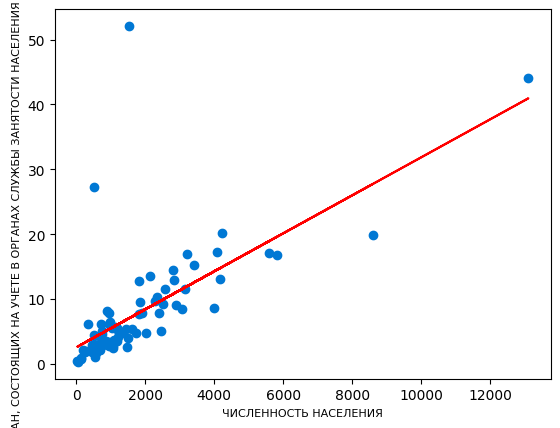


Величина достоверности аппроксимации (R^2): 0.4558
——————————


In [114]:
x = df1[["Значение в 2022"]]
y = df2["Значение в 2022"]
plt.scatter(x, y, color='#0078d4')
plt.xlabel("ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ", size=8)
plt.ylabel("ЧИСЛЕННОСТЬ НЕЗАНЯТЫХ ГРАЖДАН, СОСТОЯЩИХ НА УЧЕТЕ В ОРГАНАХ СЛУЖБЫ ЗАНЯТОСТИ НАСЕЛЕНИЯ В ЦЕЛЯХ ПОИСКА ПОДХОДЯЩЕЙ РАБОТЫ", size=8)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
r_squared = model.score(x, y)
plt.plot(x, y_pred, color='red', label='Линия аппроксимации')
plt.show()

print(f"\nВеличина достоверности аппроксимации (R^2): {r_squared:.4f}")
print("—"* 10)

2. Сделать выборку ≈ 1/3 наблюдений 
    
    2.1 случайным образом, 
    
    2.2 сделать стратифицированную выборку (разбив выборку на группы по смысловому содержанию, например, для регионов стратами могут быть федеральные округа). 

In [115]:
# Случайная выборка (~1/3 наблюдений)
# 3.30 УДЕЛЬНЫЙ ВЕС РАСХОДОВ ДОМАШНИХ ХОЗЯЙСТВ НА ОПЛАТУ ЖИЛИЩНО-КОММУНАЛЬНЫХ УСЛУГ (3.30.1. В процентах от общей суммы потребительских расходов)
df3 = get_data_frame("../datasets/razdel3-uroven-zhizni-naseleniya.xlsx", "3.30.1.", with_strats=True)
df_len = len(df3)
random_sample = df3.sample(frac=1/3, random_state=df_len)

# Стратифицированная выборка (~1/3 наблюдений)
stratified_sample = df3.groupby(df3[df3.columns[0]].str.contains("федеральный округ"), group_keys=False).apply(lambda x: x.sample(frac=1/3, random_state=df_len))

print("Случайная выборка:")
print(random_sample.head())
print("—"* 10)

print("Стратифицированная выборка:")
print(stratified_sample.head())
print("—"* 10)

Случайная выборка:
                               Регион  Значение в 2022
91       Еврейская автономная область              9.8
70      Сибирский федеральный округ3)              9.2
54               Чувашская Республика             10.0
72                    Республика Тыва              6.1
6                 Костромская область              7.7
——————————
Стратифицированная выборка:
                        Регион  Значение в 2022
2         Владимирская область             10.4
14            Тверская область              9.2
47         Ставропольский край              9.7
26       Ленинградская область             10.9
92  Чукотский автономный округ             13.3
——————————


3. Посчитать

    3.1 среднее значение по выборкам из п.2 – случайной 2.1 и стратифицированной 2.2, 

    3.2 доверительный интервал для среднего (на уровне доверия 90%, 95%, 99%).

    Сравнить среднее генеральной выборки п.2 с полученными в выборках 2.1 и 2.2 и с границами доверительных интервалов из 3.2.

In [116]:
# Расчет доверительного интервала
def confidence_interval(data, confidence=0.95):
    n = len(data)
    se = stats.sem(data)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    mean = np.mean(data)
    return mean, mean - h, mean + h

col_label = 'Значение в 2022'
col_rand_sample = random_sample[col_label]
col_strat_sample = stratified_sample[col_label]

# 1. Среднее значение по выборкам
random_mean = col_rand_sample.mean()
stratified_mean = col_strat_sample.mean()

# 2. Доверительные интервалы для среднего
random_ci_90 = confidence_interval(col_rand_sample, confidence=0.90)
random_ci_95 = confidence_interval(col_rand_sample, confidence=0.95)
random_ci_99 = confidence_interval(col_rand_sample, confidence=0.99)

stratified_ci_90 = confidence_interval(col_strat_sample, confidence=0.90)
stratified_ci_95 = confidence_interval(col_strat_sample, confidence=0.95)
stratified_ci_99 = confidence_interval(col_strat_sample, confidence=0.99)

print(f"Среднее значение случайной выборки: {random_mean:.2f}")
print(f"Среднее значение стратифицированной выборки: {stratified_mean:.2f}")

print("\nДоверительные интервалы для случайной выборки:")
print(f"90%: ({random_ci_90[1]:.2f}, {random_ci_90[2]:.2f})")
print(f"95%: ({random_ci_95[1]:.2f}, {random_ci_95[2]:.2f})")
print(f"99%: ({random_ci_99[1]:.2f}, {random_ci_99[2]:.2f})")

print("\nДоверительные интервалы для стратифицированной выборки:")
print(f"90%: ({stratified_ci_90[1]:.2f}, {stratified_ci_90[2]:.2f})")
print(f"95%: ({stratified_ci_95[1]:.2f}, {stratified_ci_95[2]:.2f})")
print(f"99%: ({stratified_ci_99[1]:.2f}, {stratified_ci_99[2]:.2f})")

# 3. Сравнение среднего генеральной выборки с выборками и границами доверительных интервалов
population_mean = df3[col_label].mean()

print(f"\nСреднее значение генеральной выборки: {population_mean:.2f}")
print("\nСравнение среднего генеральной выборки с выборками:")
print(f"Случайная выборка: {population_mean:.2f} {'входит' if random_ci_95[1] <= population_mean <= random_ci_95[2] else 'не входит'} в 95% доверительный интервал")
print(f"Стратифицированная выборка: {population_mean:.2f} {'входит' if stratified_ci_95[1] <= population_mean <= stratified_ci_95[2] else 'не входит'} в 95% доверительный интервал")

Среднее значение случайной выборки: 9.08
Среднее значение стратифицированной выборки: 9.62

Доверительные интервалы для случайной выборки:
90%: (8.69, 9.48)
95%: (8.61, 9.56)
99%: (8.45, 9.72)

Доверительные интервалы для стратифицированной выборки:
90%: (9.12, 10.11)
95%: (9.02, 10.21)
99%: (8.81, 10.42)

Среднее значение генеральной выборки: 9.56

Сравнение среднего генеральной выборки с выборками:
Случайная выборка: 9.56 входит в 95% доверительный интервал
Стратифицированная выборка: 9.56 входит в 95% доверительный интервал
